## Loading the required libraries and data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels
from statsmodels.stats.anova import AnovaRM
# import pingouin as pg
%matplotlib inline

#import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

plt.style.use("seaborn-colorblind")
plt.rcParams['figure.figsize'] = [8, 5]
# plt.rcParams['axes.linewidth'] = 2
sns.set_context("talk")
# change font of labels
plt.rcParams['font.family'] = 'arial'

df_all_agg_contious_a_b = pd.read_csv('abc_analysis_5day_withc.csv')
df_all_agg_contious_a_b.rename(columns = {'Exploration : time pressed': 'Exploration', 'Dominance : time pressed': 'Dominance', 'Attack : time pressed': 'Attack', 'attack_number_presses': 'number_att', 'Attack : latency 1st press': 'att_latency', 'Attack : mean press duration': 'mean_press'}, inplace= True)

df_all_agg_contious_a_b = df_all_agg_contious_a_b.query('Group == "A" or Group == "B"')


## Baseline aggression data for figure 1

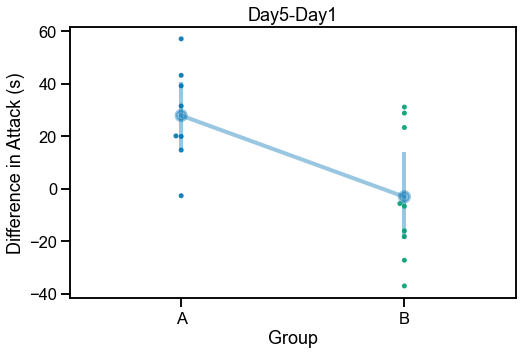

In [7]:
beh = 'Attack' # 'Exploration' 'Dominance' 'Attack', 'number_att', 'att_latency', 'mean_press'
df = df_all_agg_contious_a_b.groupby(['Animal', 'Day', 'Group']).agg(sum)
df = pd.DataFrame(df[f'{beh}'])
df = df.reset_index('Day')
df_day1_animals = df[df['Day'] == 1]
df_day5_animals = df[df['Day'] == 5]
df_diff = (df_day5_animals - df_day1_animals)
df_diff = df_diff.reset_index('Group')
df_diff = df_diff.reset_index()
g = sns.pointplot(y = f'{beh}', x = 'Group', data = df_diff, alpha = 0.10)
plt.setp(g.collections, alpha = .4)
plt.setp(g.lines, alpha = .4)
sns.swarmplot(y=f'{beh}', x="Group", data= df_diff, edgecolor="m", alpha = .90)

g.set(ylabel = 'Difference in Attack (s)')
g.set(title = 'Day5-Day1' )
sns.set_context("poster")
# plt.rcParams['figure.figsize'] = [5,5]
# plt.savefig('Day5_vs_Day1_abc_aggression.pdf')

In [8]:
# test for signifigance
df_diff_a = df_diff[df_diff['Group'] == 'A']
df_diff_b = df_diff[df_diff['Group'] == 'B']

# check if difference between groups a and b is significant
print(stats.ttest_ind(df_diff_a[f'{beh}'], df_diff_b[f'{beh}']), '\n')

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(df_diff_a[f'{beh}'], df_diff_b[f'{beh}'])

# Print the results
print("One-way ANOVA results:")
print("F-statistic:", f_stat)
print("p-value:", p_value)



Ttest_indResult(statistic=2.8502312639754046, pvalue=0.012160799311948453) 

One-way ANOVA results:
F-statistic: 8.123818258142837
p-value: 0.01216079931194845


In [9]:
# setting up for plotting and mixed lienar model
df_all_agg_contious_a_b.loc[df_all_agg_contious_a_b['Group'] == 'A', 'color'] = '#E78AC3'
df_all_agg_contious_a_b.loc[df_all_agg_contious_a_b['Group'] == 'B', 'color'] = '#66C2A5'

df = df_all_agg_contious_a_b

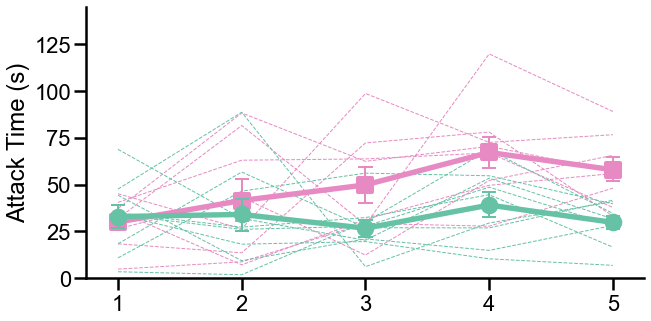

In [ ]:
# plotting

plt.rcParams["figure.figsize"] = (10,5)

line_plot = sns.pointplot(x="Day", y=f'{beh}', hue = 'Animal', palette= df[df['Group']=="A"]['color'],data=df[df['Group']=="A"], linestyles = ['--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--'], zorder = 1)
line_plot = sns.pointplot(x="Day", y=f'{beh}', hue = 'Animal', palette= df[df['Group']=="B"]['color'],data=df[df['Group']=="B"], linestyles = ['--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--'], zorder = 1)
plt.setp(line_plot.collections, alpha=0) #for the markers
plt.setp(line_plot.lines, linewidth = 1, zorder=1) #for the lines
line_plot.set(xlabel = 'Day', ylabel = f'{beh}' + ' ' + 'Time (s)') #title = '6 Day Social Aggression: Resident Intruder')


agg = sns.pointplot(data = df, x = 'Day', y= f'{beh}', ci=68, hue = 'Group', palette= ['#E78AC3', '#66C2A5'], errwidth = 2, capsize = 0.1, markers = ['s', 'o'])
agg.set(ylabel = f'{beh}' + ' ' + 'Time (s)', xlabel= '')

# move agg plot to front
agg.set_zorder(10)
line_plot.get_legend().remove()
# get rid of top and right borders
sns.despine()

plt.savefig(f'{beh}' + 'replicate.pdf')


In [ ]:
path = '...calcium_imaging_boris_files_update_with_latency.xlsx'
df = pd.read_excel(path)
sub_df.rename(columns={'exp_duration': 'Exploration', 'dom_duration': 'Dominance', 'att_duration': 'Attack'}, inplace = True)
df = sub_df

/var/folders/z0/v2xv5nkn1cdcv3mf55hwpw6w0000gn/T/ipykernel_2744/2785638625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.rename(columns={'exp_duration': 'Exploration', 'dom_duration': 'Dominance', 'att_duration': 'Attack'}, inplace = True)


## Calcium imaged mouse behavior data for figure 2

In [ ]:
path = ''
sub_df = pd.read_excel(path)
sub_df.rename(columns={'exp_duration': 'Exploration', 'dom_duration': 'Dominance', 'att_duration': 'Attack'}, inplace = True)
df = sub_df

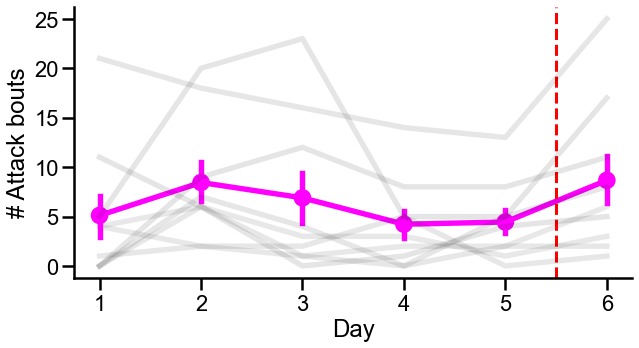

In [ ]:
beh = 'att_occurances'

line_plot = sns.pointplot(data = sub_df, x = 'day', y= f'{beh}', hue = 'mouse_id', ci=68, color = 'black')
plt.setp(line_plot.collections, alpha=0) #for the markers
plt.setp(line_plot.lines, alpha=.1)       #for the lines

sns.pointplot(data = df, x = 'day', y= f'{beh}', ci=68, color = 'magenta')

line_plot.set(xlabel = 'Day', ylabel = '# Attack bouts')

plt.axvline(4.5, 0,1, color = 'r', linestyle = '--', label = 'new_intruder')
plt.legend(title = 'Mouse_ids', loc = 'lower left', bbox_to_anchor = (1,0))
line_plot.get_legend().remove()

# # get rid of top and right borders
sns.despine()
# move agg plot to front
agg.set_zorder(10)
# get rid of top and right borders
sns.despine()
# decrease margins of figure
plt.margins(0.05)
